# Bring in the Energy/Weather data

In [3]:
import numpy as np
np.random.seed(42)
import os

# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#plt.rcParams['axes.labelsize'] = 14
#plt.rcParams['xtick.labelsize'] = 12
#plt.rcParams['ytick.labelsize'] = 12

# Save Images
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
import pandas as pd

PROJECT_DATA_DIR = os.path.join(PROJECT_ROOT_DIR, 'data')
FILE_NAME = "energydata_complete.csv"

def load_data(file_name, data_path=".."):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

#def load_data(data_path):
 #   csv_path = os.path.join(data_path, "energydata_complete.csv")
  #  return pd.read_csv(csv_path)

In [5]:
#energy_data = load_energy_data(DATA_PATH)
energy_data = load_data(FILE_NAME, PROJECT_DATA_DIR)
energy_data.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


# Energy Data 
Jan 11 2016 - May 27 2016

144 measure per day

1008 per week

4032 per month

In [6]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [7]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## Date Format
Format all the dates into a datetime for timemseries stuff, and get Weekday/Weekend classifications

In [8]:
from datetime import datetime

# Convert to datetime
# energy_data['date_fmt'] = energy_data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
energy_data['date'] = energy_data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

# Index and sort
# energy_data.set_index('date_fmt')
energy_data.set_index('date')
energy_data.sort_index(inplace=True)

# Ticks
energy_data['ticks'] = range(0, len(energy_data.index.values))
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,ticks
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,3
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,4


In [9]:
# Classify Weekend vs Weekday
# results w/ Monday at 0

# This func is for labels if needed
def get_day(date):
    day_int = date.weekday()
    
    day_switch = {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday"
    }
    return day_switch.get(day_int, "Invalid day")

# Just need datetime.weekday for #
energy_data["day_of_week_class"] = energy_data["date"].apply(datetime.weekday)



In [10]:
energy_data["day_of_week_class"].value_counts()

3    2880
2    2880
1    2880
4    2845
0    2778
6    2736
5    2736
Name: day_of_week_class, dtype: int64

# TODO: Should have event day counts, correct?

Actually may be fine as long as dif < 144*2

In [11]:
# 0 is weekday
def weekend_weekday(date):
    if date.weekday() == 5 or date.weekday() == 6:
        return 1
    else:
        return 0

energy_data["weekend_class"] = energy_data["date"].apply(weekend_weekday)

In [12]:
energy_data["weekend_class"].value_counts()

0    14263
1     5472
Name: weekend_class, dtype: int64

# Validation

Lets set aside the last month

In [13]:
# TODO: Input validations
def timeseries_validation_split(series, percent):
    size = len(series.index)
    factor = (100 - percent) / 100
    split_index = (int)(size * factor)
    
    train, validate = series[0:split_index], series[split_index:]
    
    return train, validate
    #return series[0:split_index], series[split_index:]

In [14]:
#energy_data_test, energy_data_validation = energy_data[0:15702], energy_data[15702:]
#energy_data_validation.describe()

energy_data_test, energy_data_validation = timeseries_validation_split(energy_data, 20)
print(len(energy_data_test.index))
print(len(energy_data_validation.index))

energy_data = energy_data_test

15788
3947


In [15]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,ticks,day_of_week_class,weekend_class
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,...,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.00000,15788.000000,15788.000000
mean,98.024449,4.314036,21.152184,40.037455,19.631593,40.556150,21.588743,39.339250,20.148708,38.917235,...,755.401923,81.834642,4.276856,38.672314,2.731101,25.025954,25.025954,7893.50000,2.980111,0.276793
std,105.198291,8.363499,1.214241,3.593212,1.516601,3.396775,1.498186,3.205111,1.508309,4.276400,...,7.778350,12.920004,2.555565,12.402705,3.523068,14.521067,14.521067,4557.74736,1.980390,0.447427
min,10.000000,0.000000,16.790000,27.733333,16.100000,25.763333,17.200000,32.626667,15.100000,27.660000,...,729.300000,31.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.00000,0.000000,0.000000
25%,50.000000,0.000000,20.500000,37.290000,18.566667,38.266667,20.500000,36.966667,19.200000,35.462500,...,750.600000,73.333333,2.000000,29.000000,0.400000,12.585736,12.585736,3946.75000,1.000000,0.000000
50%,60.000000,0.000000,21.290000,39.530000,19.566667,40.560000,21.633333,38.633333,20.260000,38.290000,...,755.933333,85.333333,4.000000,40.000000,2.757143,24.917394,24.917394,7893.50000,3.000000,0.000000
75%,100.000000,10.000000,22.000000,42.722708,20.600000,43.126667,22.600000,41.790000,21.200000,41.863333,...,761.366667,92.000000,6.000000,40.000000,5.200000,37.733747,37.733747,11840.25000,5.000000,1.000000
max,1080.000000,70.000000,24.100000,63.360000,24.600000,56.026667,27.600000,50.163333,23.760000,51.090000,...,772.300000,100.000000,14.000000,66.000000,11.400000,49.996530,49.996530,15787.00000,6.000000,1.000000


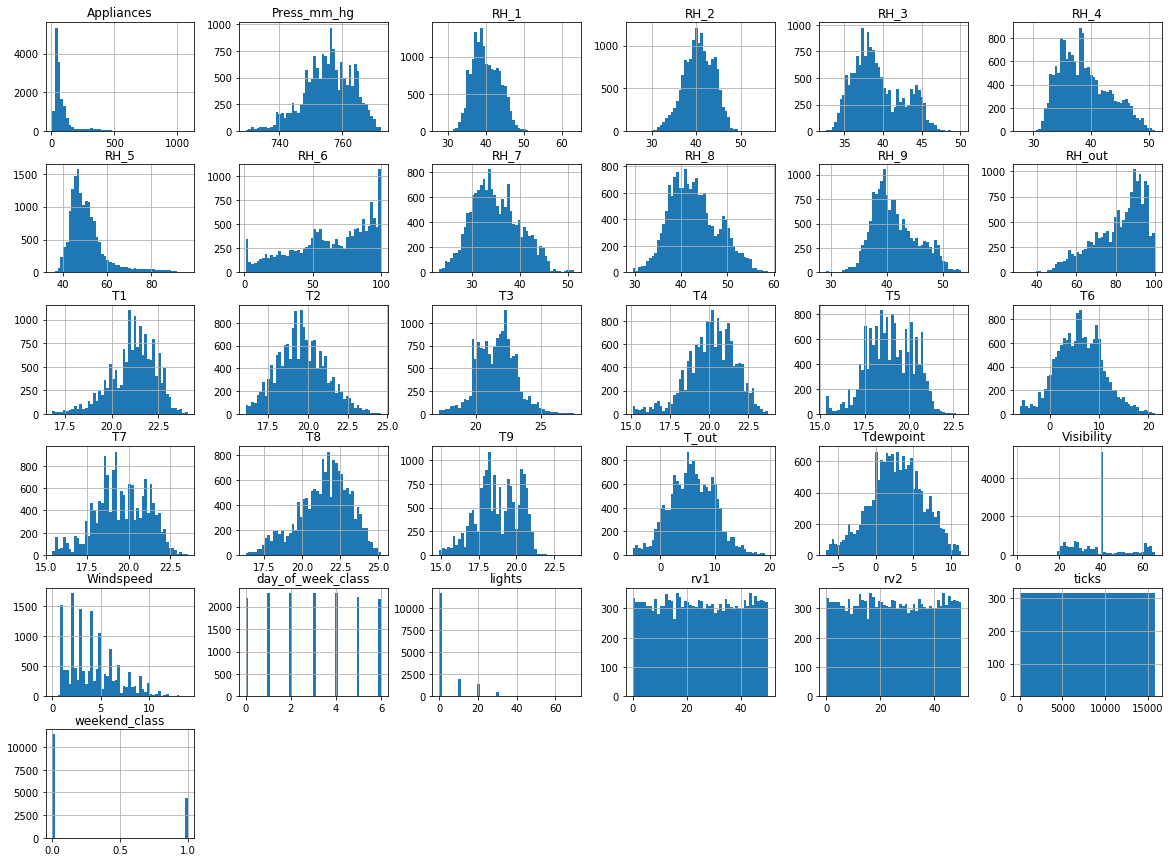

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
energy_data.hist(bins=50, figsize=(20,15))
plt.show()

# Now we can observe (read: clean)

Appliances: Standard Dev is high compared to mean, especially factoring in min and max. So, we will have a big initial hump (maybe close to localized normal), and some big positive outliers

Lights: 
    - a lot of time on 0, maybe we can catogorize/bin this val
    - Remove Zeroes and take a hist? => appliances?
    

Visibility: one huge bin?

Windspeed: Levels?

Wait to label until labels
Temps:
    - "Spikey bins"? => Equilibrium point/level?
    - otherwise center lump
    
Humidity:
    - left side lump
    - but one is flat?
    - definitely some cutoff
    

# TODO: 
Switch to TS Object from lib
Make the influx cutoff from there

Two sided structure: 
    - dataframe for Jupyter Analytics
    - Array for implimented ML algorithms
    


In [17]:
# Lets break the varibales into lists
#lumps = T-RH

leveled = ["Visibility", "Windspeed", "day_of_week_class", "weekend_class"]
dirt = ["lights"] #loam?


## Decomposition
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [18]:
from random import randrange
from pandas import Series
from matplotlib import pyplot

from statsmodels.tsa.seasonal import seasonal_decompose
#from pandas.core import datetools

from pandas import Series

/home/nathaniel/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Appliance Energy

## Stationality

## DF Test
https://machinelearningmastery.com/time-series-data-stationary-python/

In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(energy_data['Appliances'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.010131
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


### H(0): Has unit root, is non stationary
### H(1): No unit root, is stationary

### Reject
This would indicate that the series is stationary

## TATMASITAN
Take a thousand means and see if they are normal

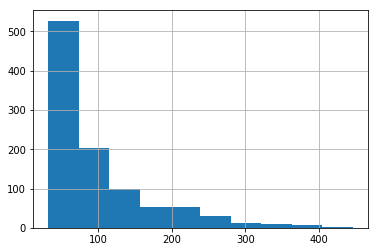

In [20]:
import math
def tatm(series, n=1000):
    means = []
    
    step_size = math.floor(len(series.index) / n)
    
    #index = 0 
    for i in range(0, n):
        #low = index * step_size
        #hi = (index + 1) * step_size
   
        low = i * step_size
        hi = (i + 1) * step_size
   
        #print(low)
        #print(hi)
        mean = sum(series[low:hi]) / step_size
        means.append(mean)
        #print(mean)
        #print()
        
    return means

means = Series(tatm(energy_data['Appliances'], n=1000))

means.hist()

My thought here is that of we walked through and took means all across the series, we should get a normal dist of means if the series is stationary. 

This looks loggy:
    - which might mean non-stationary
    - But, the origional function is loggy?
    - This at least in my mind puts ADF in doubt for this series

# Auto Correlation 
https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

## Full

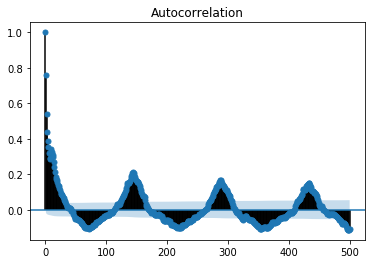

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(energy_data['Appliances'], lags=500)
pyplot.show()

## Partial

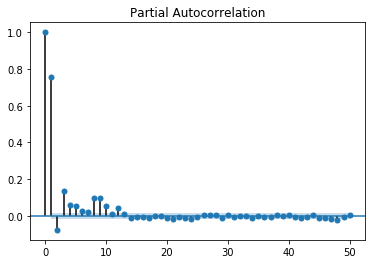

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(energy_data['Appliances'], lags=50)
pyplot.show()


# First Decomp
## Daily

In [23]:
KEY = 'Appliances'

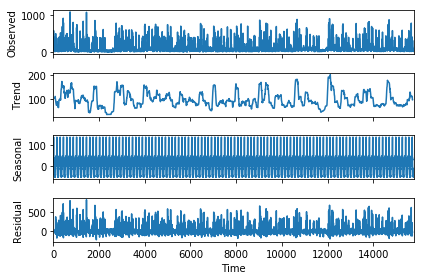

In [25]:
%matplotlib inline

result = seasonal_decompose(energy_data[KEY].values, model='additive', two_sided=True, freq=144)

# Out
result.plot()
pyplot.show()

In [1]:
# Generate a lot of graph


# 1
result = seasonal_decompose(energy_data[KEY].values, model='additive', two_sided=True, freq=144)
result.plot()
save_fig('appliances_additive_twoside_a_day')


result = seasonal_decompose(energy_data[KEY].values, model='additive', two_sided=True, freq=1008)
result.plot()
save_fig('appliances_additive_twoside_b_week')

result = seasonal_decompose(energy_data[KEY].values, model='additive', two_sided=True, freq=4032)
result.plot()
save_fig('appliances_additive_twoside_c_month')

# 2
result = seasonal_decompose(energy_data[KEY].values, model='additive', two_sided=False, freq=144)
result.plot()
save_fig('appliances_additive_oneside_a_day')

result = seasonal_decompose(energy_data[KEY].values, model='additive', two_sided=False, freq=1008)
result.plot()
save_fig('appliances_additive_oneside_b_week')

result = seasonal_decompose(energy_data[KEY].values, model='additive', two_sided=False, freq=4032)
result.plot()
save_fig('appliances_additive_oneside_c_month')

# 3
result = seasonal_decompose(energy_data[KEY].values, model='multiplicitive', two_sided=True, freq=144)
result.plot()
save_fig('appliances_multiplicitive_twoside_a_day')

result = seasonal_decompose(energy_data[KEY].values, model='multiplicitive', two_sided=True, freq=1008)
result.plot()
save_fig('appliances_multiplicitive_twoside_b_week')

result = seasonal_decompose(energy_data[KEY].values, model='multiplicative', two_sided=True, freq=4032)
result.plot()
save_fig('appliances_multiplicitive_twoside_c_month')

# 4
result = seasonal_decompose(energy_data[KEY].values, model='multiplicitive', two_sided=False, freq=144)
result.plot()
save_fig('appliances_multiplicitive_oneside_a_day')

result = seasonal_decompose(energy_data[KEY].values, model='multiplicitive', two_sided=False, freq=1008)
result.plot()
save_fig('appliances_multiplicitive_oneside_b_week')

result = seasonal_decompose(energy_data[KEY].values, model='multiplicative', two_sided=False, freq=4032)
result.plot()
save_fig('appliances_multiplicitive_oneside_c_month')



NameError: name 'seasonal_decompose' is not defined

# Light Energy
## Daily

In [ ]:
%matplotlib inline

result.plot()
pyplot.show()

In [ ]:
%matplotlib inline
result = seasonal_decompose(energy_data['Appliances'].values, model='additive', two_sided=True, freq=144)
result.plot()
pyplot.show()

In [ ]:
%matplotlib inline
result = seasonal_decompose(energy_data['Appliances'].values, model='multiplicitive', two_sided=False, freq=144)
result.plot()
pyplot.show()

# BREAK
# Correlation

In [ ]:
# TODO: Pearson Correlation
corr_matrix = energy_data.corr()
dependent_corr = corr_matrix["Appliances"]
dependent_corr

In [ ]:
dependent_corr.drop("Appliances").hist()

In [ ]:
#CORR_LEVEL = 0.07
CORR_LEVEL = 0.1
dependent_corr = corr_matrix["Appliances"]
drop_list = []

for column in energy_data.columns.drop("date"):
    val = dependent_corr[column]
    
    # TODO:  cat variables
    # dont_drop = False
    dont_drop = column in dont_drop_list

    if(abs(dependent_corr[column]) < CORR_LEVEL) and (dont_drop==False):
        drop_list.append(column)
        
#drop_list   
energy_data_filtered = energy_data.drop(drop_list, axis=1)

In [ ]:
energy_data_filtered.describe()

In [ ]:
energy_data = energy_data_filtered

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
energy_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
def get_corr_matrix(dataframe, dependent, corr_level=None):
    corr_matrix = dataframe.corr()
    dependent_corr = corr_matrix[dependent]

    dependent_corr.drop(dependent).hist()

    if corr_level is None:
        return
    
    dependent_corr = corr_matrix["Appliances"]
    drop_list = []

    for column in energy_data.columns.drop("date").drop("date_fmt"):
        val = dependent_corr[column]
        if abs(dependent_corr[column]) < CORR_LEVEL:
            drop_list.append(column)
        
    drop_list   
    energy_data_filtered = energy_data.drop(drop_list, axis=1)

## Date Format
Format all the dates into a datetime for timemseries stuff, and get Weekday/Weekend classifications

In [ ]:
from datetime import datetime

# Convert to datetime
energy_data['date_fmt'] = energy_data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

# Index and sort
energy_data.set_index('date_fmt')
energy_data.sort_index(inplace=True)
# Ticks
energy_data['ticks'] = range(0, len(energy_data.index.values))
energy_data.head()

In [ ]:
# Classify Weekend vs Weekday
# results w/ Monday at 0

# This func is for labels if needed
def get_day(date):
    day_int = date.weekday()
    
    day_switch = {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday"
    }
    return day_switch.get(day_int, "Invalid day")

# Just need datetime.weekday for #
energy_data["weekday_class"] = energy_data["date_fmt"].apply(datetime.weekday)



In [ ]:
energy_data["weekday_class"].value_counts()

In [ ]:
# 0 is weekday
def weekend_weekday(date):
    if date.weekday() == 5 or date.weekday() == 6:
        return 1
    else:
        return 0

energy_data["weekend_class"] = energy_data["date_fmt"].apply(weekend_weekday)

In [ ]:
energy_data["weekend_class"].value_counts()

In [ ]:
energy_data.describe()

## Now we can observe

Appliances: Standard Dev is high compared to mean, especially factoring in min and max. So, we will have a big initial hump (maybe close to localized normal), and some BIG positive outliers

Lights: a lot of time on 0, maybe we can catogorize/bin this val

Visibility: one huge bin?

Windspeed: Levels?

In [ ]:
def get_corr_matrix(dataframe, dependent, corr_level=None):
    corr_matrix = dataframe.corr()
    dependent_corr = corr_matrix[dependent]

    dependent_corr.drop(dependent).hist()

    if corr_level is None:
        return
    
    dependent_corr = corr_matrix["Appliances"]
    drop_list = []

    for column in energy_data.columns.drop("date").drop("date_fmt"):
        val = dependent_corr[column]
        if abs(dependent_corr[column]) < CORR_LEVEL:
            drop_list.append(column)
        
    drop_list   
    energy_data_filtered = energy_data.drop(drop_list, axis=1)
    

In [ ]:
get_corr_matrix(energy_data, "Appliances")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
energy_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## First Plot

In [ ]:
fig = plt.figure(1)
axl = fig.add_subplot(111)
axl.set_xlabel('Time')
axl.set_ylabel('Out (kw)')
axl.plot('date_fmt', 'Appliances', data = energy_data)


## Smooth and Zoom
First full is index 42
6*24 = 184 measurements a day

In [ ]:
# Lets look at the last 3 hours, or 3*60/10
# window = 80
window = 18

energy_data['Rolling Appliances'] = energy_data['Appliances'].rolling(window = window).mean()

In [ ]:
fig = plt.figure(1)
axl = fig.add_subplot(111)
axl.set_xlabel('Time')
axl.set_ylabel('Out (kw)')
axl.plot('date_fmt', 'Rolling Appliances', data = energy_data)


In [ ]:
day1_start = 42
day_size = 144
day1_end = day1_start + day_size

energy_data["date_fmt"][day1_end]
day_size

# 1<-7<-30 days

In [ ]:
energy_day = energy_data[day1_start:day1_end]

energy_7day = energy_data[day1_start:day1_end+(6*day_size)]

energy_30day = energy_data[day1_start:day1_end+(29*day_size)]

energy_7day.describe()

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

axes[0].plot('date_fmt', 'Appliances', data = energy_day)
axes[0].set_title('One Day')

axes[1].plot('date_fmt', 'Appliances', data = energy_7day)
axes[1].set_title('Seven Days')

axes[2].plot('date_fmt', 'Appliances', data = energy_30day)
axes[2].set_title('30 Days')

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

axes[0].plot('date_fmt', 'Rolling Appliances', data = energy_day)
axes[0].set_title('One Day')

axes[1].plot('date_fmt', 'Rolling Appliances', data = energy_7day)
axes[1].set_title('Seven Days')

axes[2].plot('date_fmt', 'Rolling Appliances', data = energy_30day)
axes[2].set_title('30 Days')

# First three days

In [ ]:
#day_size = day1_start
energy_day2 = energy_data[day1_start+day_size:day1_end+day_size]

energy_day3 = energy_data[day1_start+(2*day_size):day1_end+(2*day_size)]

energy_day4 = energy_data[day1_start+(3*day_size):day1_end+(3*day_size)]

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

axes[0].plot('date_fmt', 'Appliances', data = energy_day2)
axes[0].set_title('2nd Day')

axes[1].plot('date_fmt', 'Appliances', data = energy_day3)
axes[1].set_title('3rd Day')

axes[2].plot('date_fmt', 'Appliances', data = energy_day4)
axes[2].set_title('4th Day')

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

axes[0].plot('date_fmt', 'Rolling Appliances', data = energy_day2)
axes[0].set_title('2nd Day')

axes[1].plot('date_fmt', 'Rolling Appliances', data = energy_day3)
axes[1].set_title('3rd Day')

axes[2].plot('date_fmt', 'Rolling Appliances', data = energy_day4)
axes[2].set_title('4th Day')

# Hour, 2 Hour, 3 hour

In [ ]:
energy_hour = energy_data[day1_start:day1_start+(2*6)]

energy_2hour = energy_data[day1_start:day1_start+(4*6)]

energy_3hour = energy_data[day1_start:day1_start+(6*6)]

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

axes[0].plot('date_fmt', 'Rolling Appliances', data = energy_hour)
axes[0].set_title('One Day')

axes[1].plot('date_fmt', 'Rolling Appliances', data = energy_2hour)
axes[1].set_title('Seven Days')

axes[2].plot('date_fmt', 'Rolling Appliances', data = energy_3hour)
axes[2].set_title('30 Days')

So, I think we get our fold/step size down to 144, and start with a day-size fold-forward. Move to step-forward technique later.
https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

__Rolling Mean:__ Honestly the variance is pretty high, so maybe not useful.

# Train/Test split
First we will train a model of week 1

In [ ]:
week1_start = day1_start
week1_len = (day_size* 7)

In [ ]:
week1_start = day1_start

energy_7day = energy_data[day1_start:day1_start+(day_size* 7)]
energy_7day.info()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
    
X = energy_7day.values
splitter = TimeSeriesSplit(n_splits=6)

index = 1
for train_index, test_index in splitter.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Iteration %d' % (index))
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    print()
    index += 1

### Model training function
Not sure if the TimeSeries has a similar library for testing over folds, so ill write a quick function to take in data, splits, model, and aggretator (like an average of model scores

In [ ]:
def time_series_fold(pandas_frame, splits, model, aggregate):
    X = pandas_frame.values
    splitter = TimeSeriesSplit(n_splits=splits)
    results = []
    
    index = 1
    for train_index, test_index in splitter.split(X):
        train = X[train_index]
        test = X[test_index]
        
        # Execute the Model
        results.append(model(index, train, test))
        
        # Aggregate returns
        agg_results = aggregate(results)
        
        index += 1
    return agg_results
        



This is placeholder for the model training function. It should return the model metric (R2 or what have you), index is a placeholder

In [ ]:
def print_lens(index, train, test):
        print('Iteration %d' % (index))
        print('Observations: %d' % (len(train) + len(test)))
        print('Training Observations: %d' % (len(train)))
        print('Testing Observations: %d' % (len(test)))
        print()
        
        return index


This is an example of an aggregate function, which takes the models' scores and spits out an aggregated evaluation. Everthing needs to be incorporated in the list, so for example, a weight could be a list of dicts, or a list of two lists, etc. 

In [ ]:
def average(list):
    total = sum(list)
    
    return total/len(list)
    

In [ ]:
time_series_fold(energy_7day, 6, print_lens, average)

# Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression().fit(energy_day2[['date_fmt']], energy_day2[['Rolling Appliances']])



In [ ]:
energy_data.corr()